In [133]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import sys
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from experiments.viz import *
from experiments import viz

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 8


In [21]:
# run comparison aggregations
!python3 "../02_aggregate_comparisons.py"

	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/sonar/train-test
../02_aggregate_comparisons.py:52: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/heart/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/breast-cancer/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/haberman/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/ionosphere/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/diabetes/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/german-credit/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/juvenile/train-test
	processing path /accounts/projects/

# classification

In [ ]:
metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

        #     print(list(df.keys()))
        plt.figure(figsize=(6, 4))
        #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            alpha = 1.0 if 'saps' in dset_name else 0.5            
            kwargs = dict(color=colors[i], alpha=alpha)            

            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                     label=name + ' (Test)')
#             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                      label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('AUC')
            dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)
        plt.show()
    except:
        print('skipping', dset_name)

# regression

In [55]:
df.keys()

Index(['max_rules', 'friedman1_r2_train', 'friedman1_explained_variance_train',
       'friedman1_neg_mean_squared_error_train', 'friedman1_r2_test',
       'friedman1_explained_variance_test',
       'friedman1_neg_mean_squared_error_test', 'friedman1_complexity',
       'friedman1_time', 'mean_r2', 'mean_explained_variance',
       'mean_neg_mean_squared_error', 'mean_complexity', 'mean_time',
       'max_depth', 'posthoc_ridge', 'include_linear', 'n_estimators',
       'model'],
      dtype='object')

In [ ]:
metric = 'mse'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index

    plt.figure(figsize=(6, 4))
    #     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                 label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                  label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        #         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)

# nicer plots

In [24]:
len(DATASETS_CLASSIFICATION)

11

In [134]:
def make_nice_plots(metric='rocauc', num_dsets=6, datasets=DATASETS_CLASSIFICATION,
                    models_to_include=['SAPS', 'CART'], save_name='fig'):
    R, C = ceil(num_dsets / 3), 3
    plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')
    
    COLORS = {
        'SAPS': 'black',
        'CART': cp,
        'Rulefit': 'green',
        'C45': cb,
        'CART_(MSE)': cp,
        'CART_(MAE)': cg,
        'SAPS_(Reweighted)': cg,
        'SAPS_(Include_Linear)': cb,
    }
    
    for i, dset in enumerate(tqdm(datasets[::-1][:num_dsets])):
        dset_name = dset[0]
#         try:
        plt.subplot(R, C, i + 1)
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index
        for _, (name, g) in enumerate(df.groupby('model')):
            if name in models_to_include:
                args = np.argsort(g[f'{dset_name}_complexity'])
                alpha = 1.0 if 'SAPS' == name else 0.35            
                lw = 2 if 'SAPS' == name else 1.5
                kwargs = dict(color=COLORS[name], alpha=alpha, lw=lw)            
#                 print(g.keys())
                plt.plot(g[f'{dset_name}_complexity'][args],
                         g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                         label=name.replace('_', ' '))
    #             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
    #                      label=name + ' (Train)')
                plt.xlabel('Number of rules')
                plt.xlim((0, 20))
                plt.ylabel(dset_name.capitalize().replace('-', ' ') + ' ' + metric.upper().replace('ROC', '').replace('R2', '$R^2$'))
#         if i % C == C - 1:
        if i % C == C - 1:    
            dvu.line_legend(fontsize=10, xoffset_spacing=0.12, adjust_text_labels=True)
#         except:
#             print('skipping', dset_name)
    viz.savefig(save_name)

100%|██████████| 6/6 [00:01<00:00,  5.44it/s]


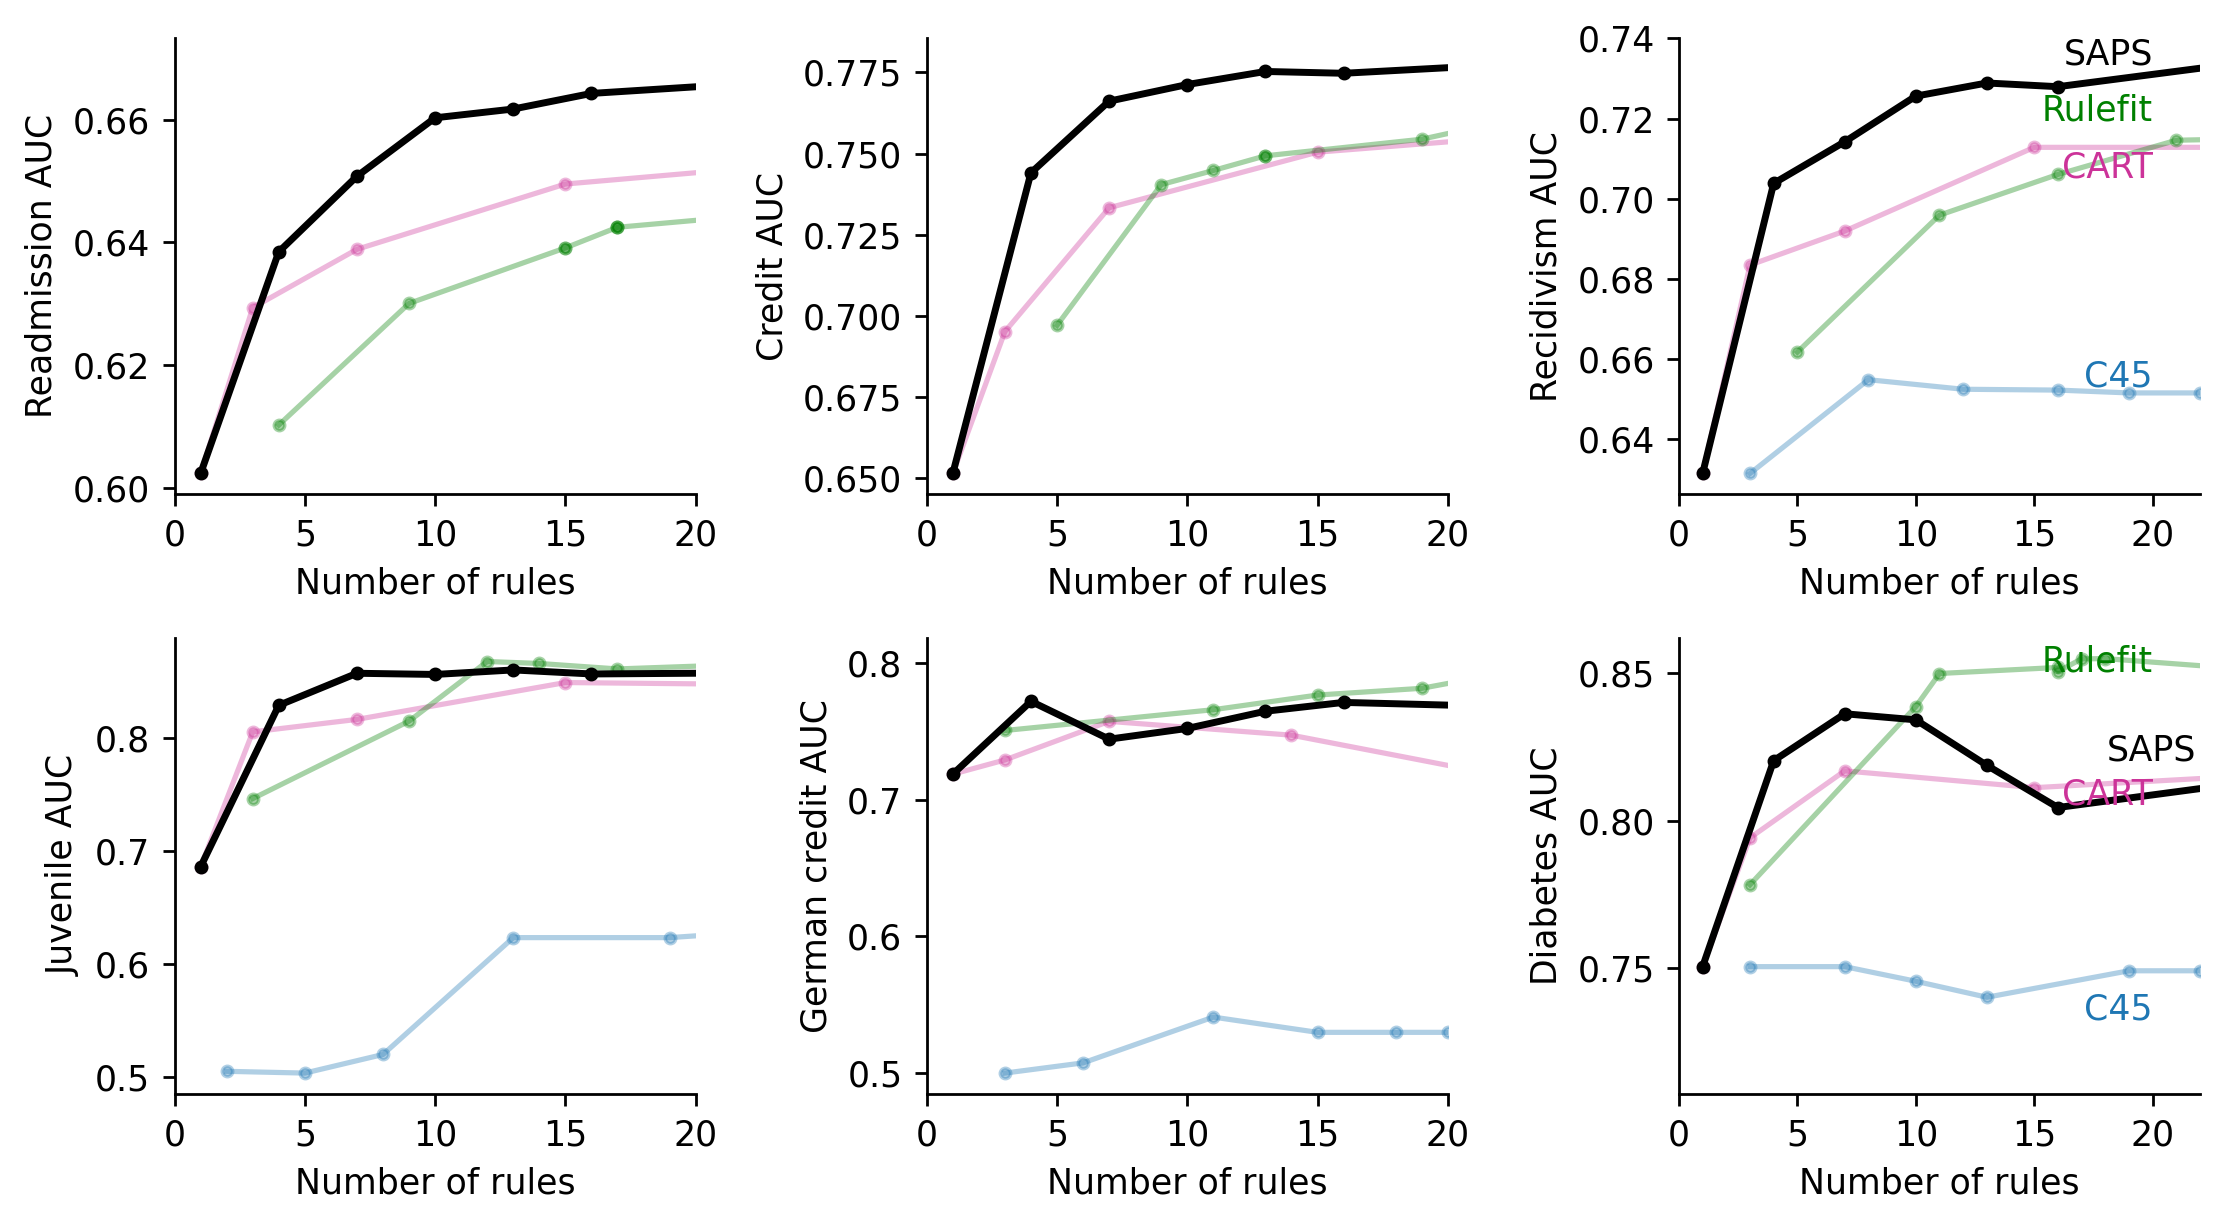

In [136]:
make_nice_plots(metric='rocauc', num_dsets=6, datasets=DATASETS_CLASSIFICATION,
                models_to_include=['SAPS', 'CART', 'Rulefit', 'C45', 'CART_(MSE)', 'CART_(MAE)'],
                save_name='classification')

100%|██████████| 8/8 [00:01<00:00,  4.40it/s]


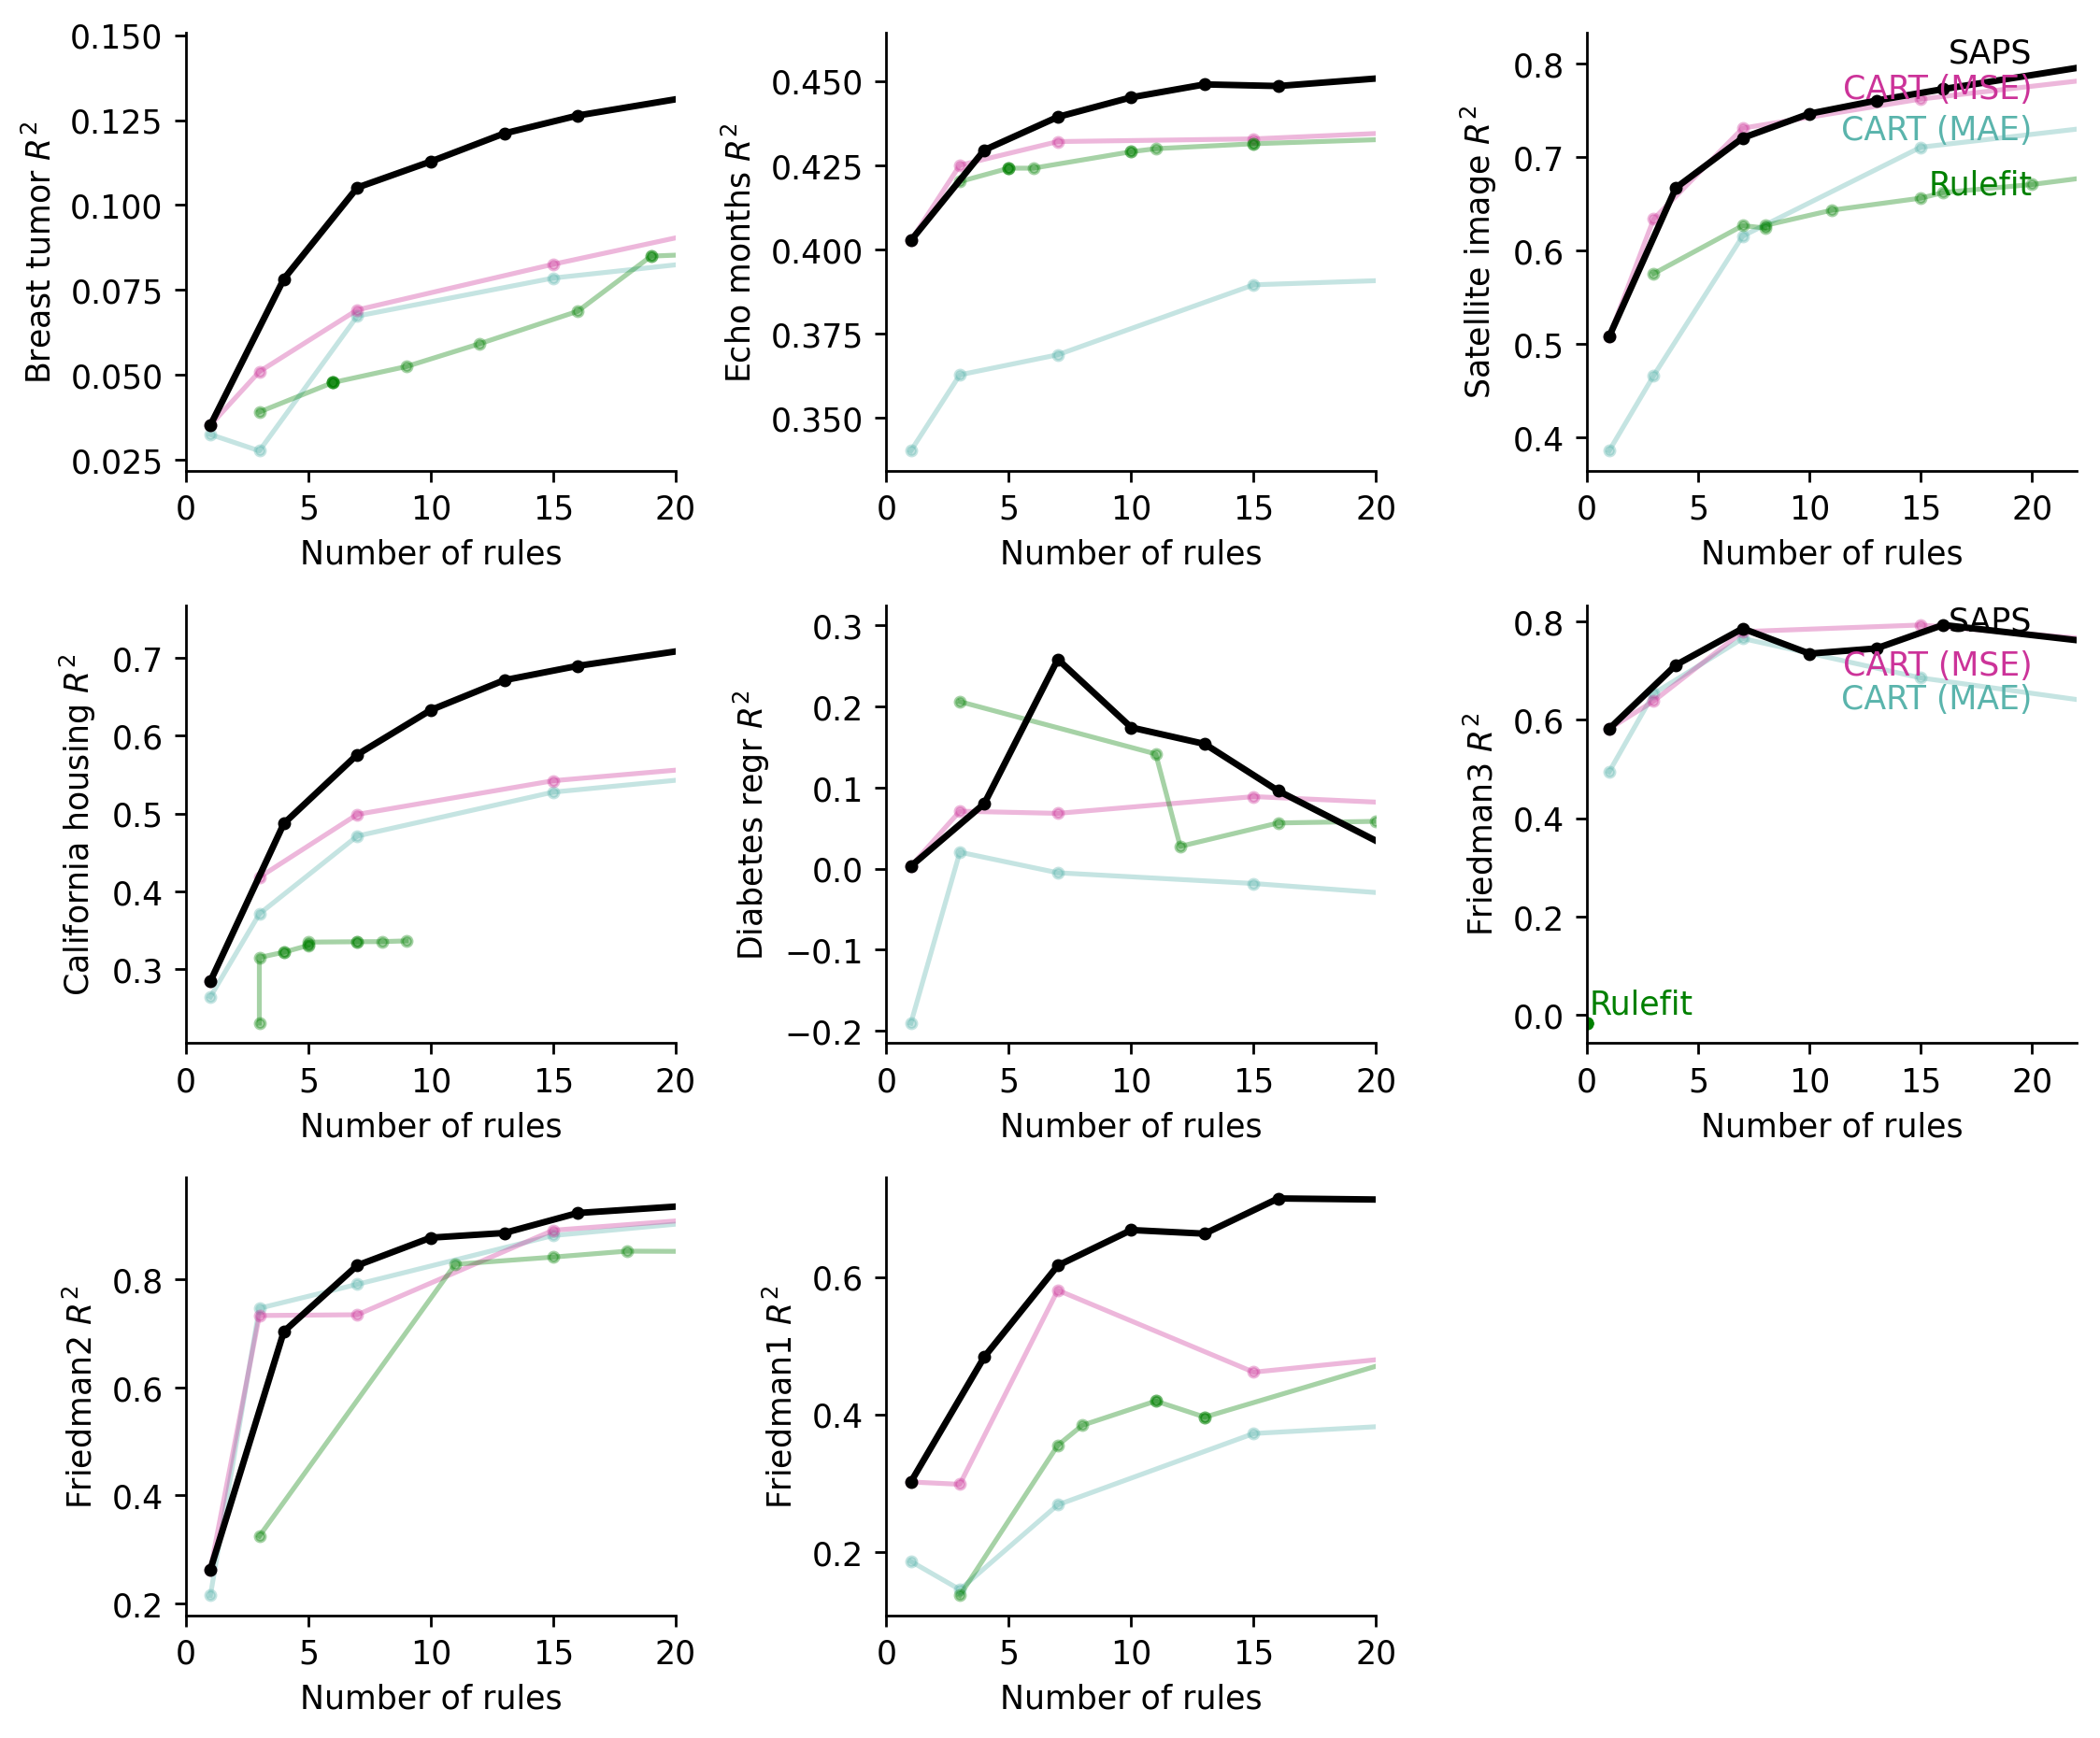

In [137]:
make_nice_plots(metric='r2', num_dsets=9, datasets=DATASETS_REGRESSION,
                models_to_include=['SAPS', 'CART', 'Rulefit', 'C45', 'CART_(MSE)', 'CART_(MAE)'],
                save_name='regression') # neg_mean_squared_error, r2

100%|██████████| 6/6 [00:01<00:00,  3.66it/s]


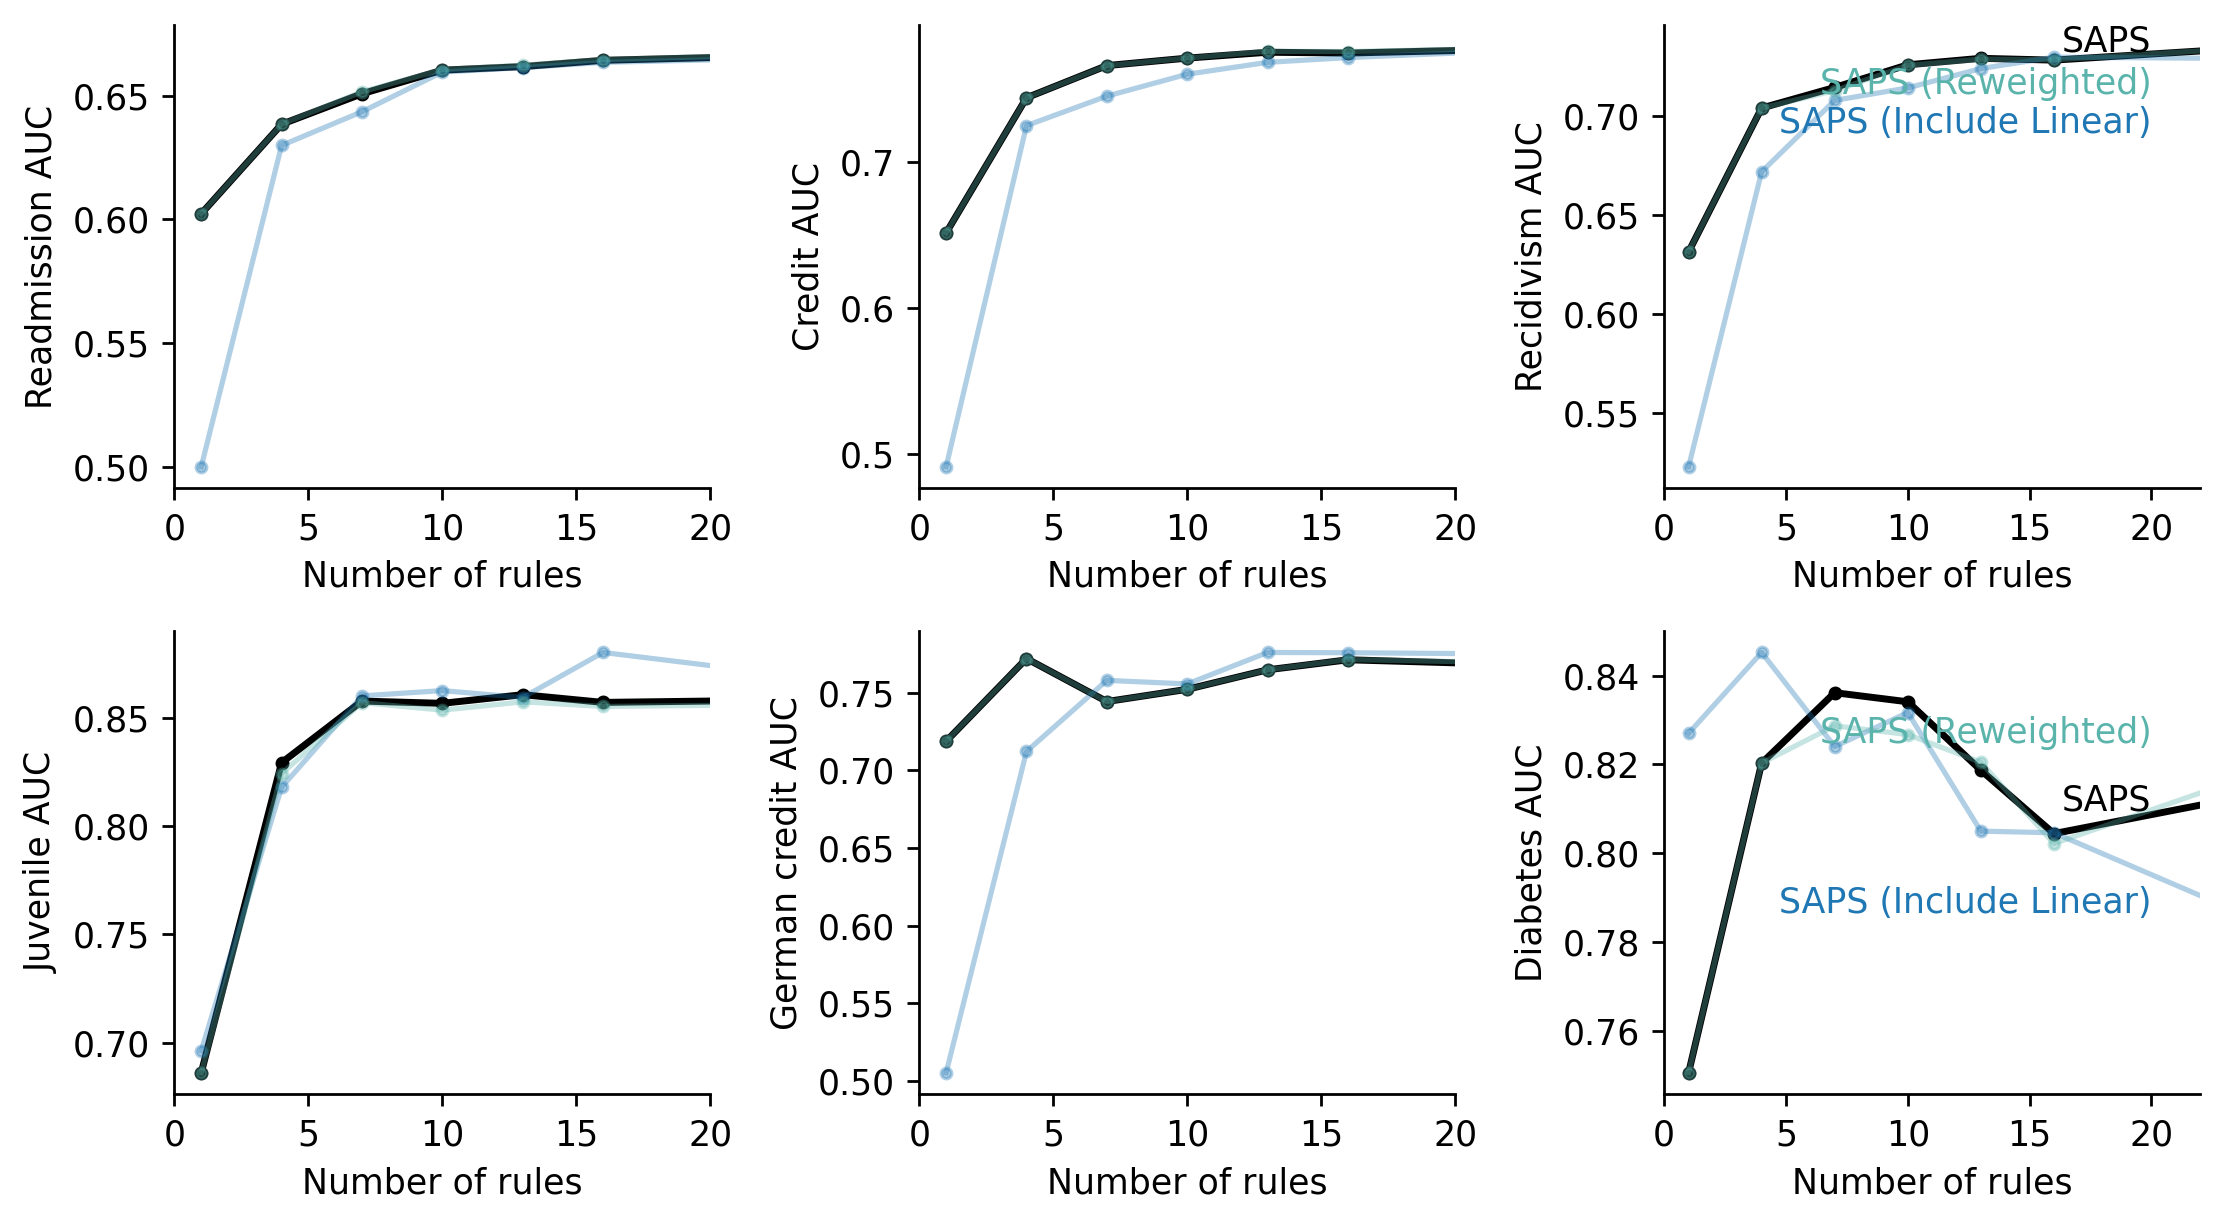

In [139]:
make_nice_plots(metric='rocauc', num_dsets=6, datasets=DATASETS_CLASSIFICATION,
                models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
                save_name='classification_variants') # neg_mean_squared_error, r2

100%|██████████| 8/8 [00:01<00:00,  4.81it/s]


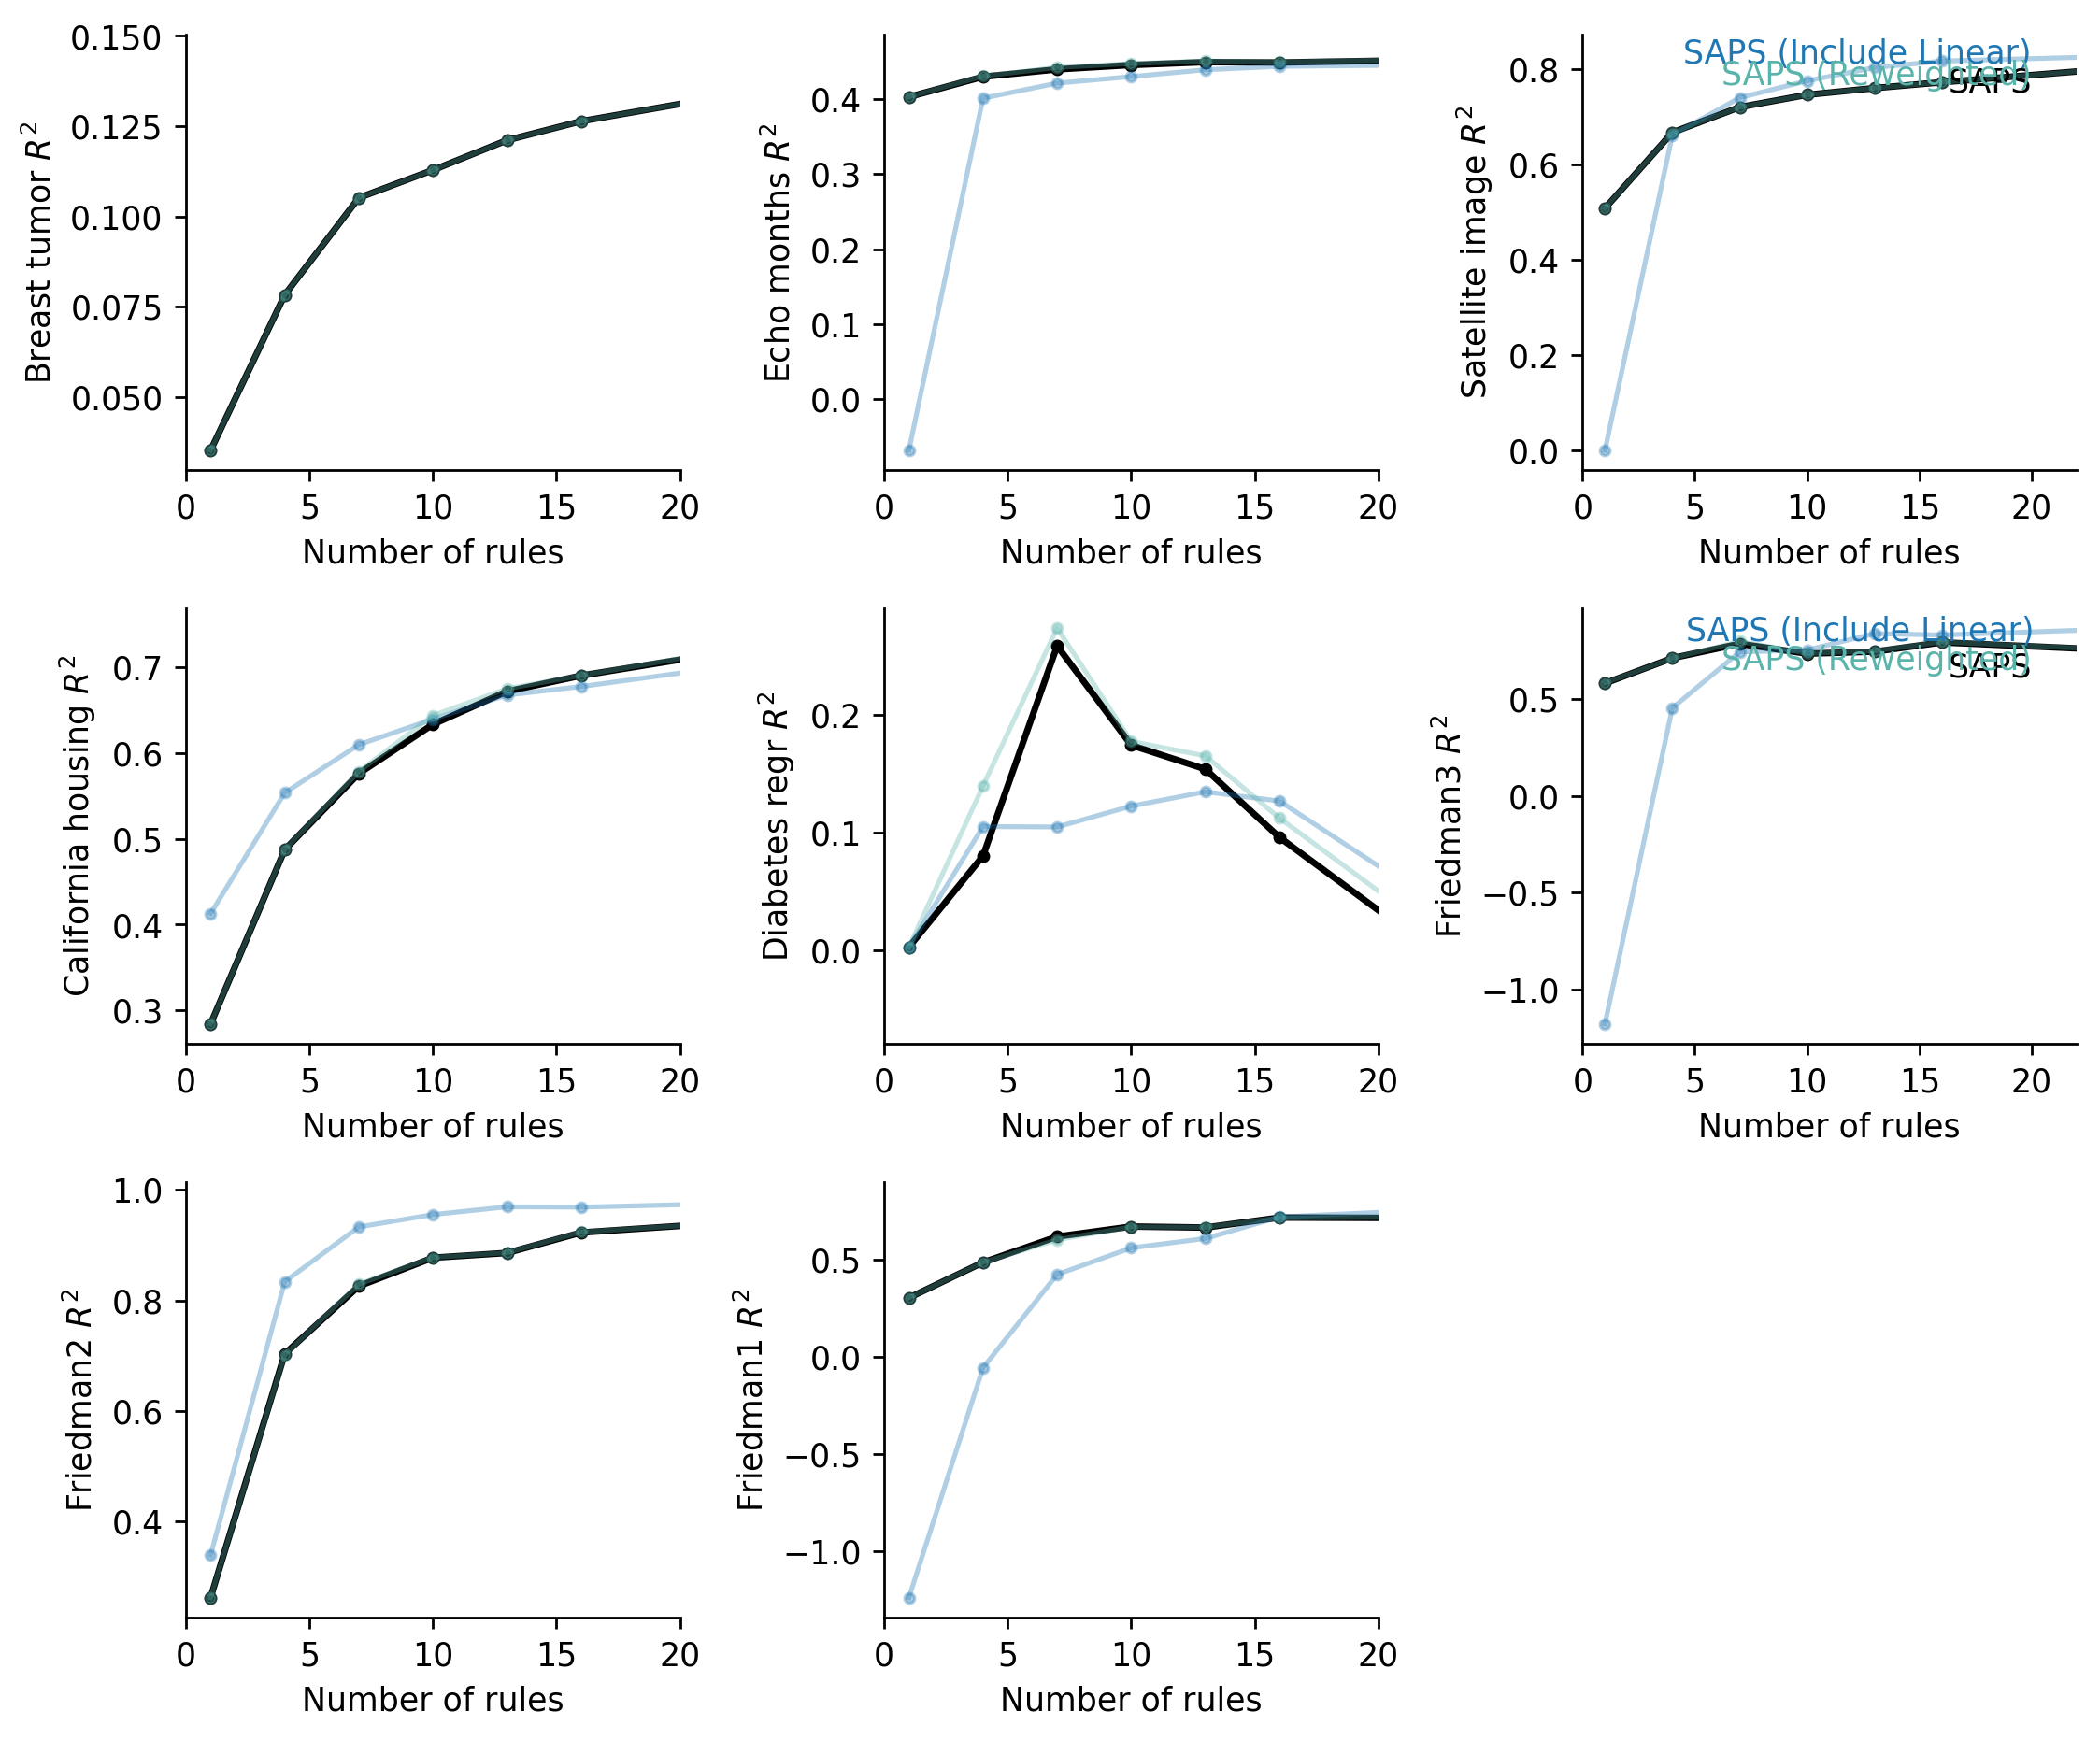

In [140]:
make_nice_plots(metric='r2', num_dsets=9, datasets=DATASETS_REGRESSION,
                models_to_include=['SAPS', 'SAPS_(Include_Linear)', 'SAPS_(Reweighted)'],
                save_name='regression_variants') # neg_mean_squared_error, r2